In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
file_path = "Crime_Data_from_2020_to_Present.csv"
data = pd.read_csv("C:\\Users\\SHAFINA JALEEL\\OneDrive\\Desktop\\THANZEER\\Project\\New folder\\Crime_Data_from_2020_to_Present.csv")

print("Dataset Info:")
print(data.info())

print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003448 entries, 0 to 1003447
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1003448 non-null  int64  
 1   Date Rptd       1003448 non-null  object 
 2   DATE OCC        1003448 non-null  object 
 3   TIME OCC        1003448 non-null  int64  
 4   AREA            1003448 non-null  int64  
 5   AREA NAME       1003448 non-null  object 
 6   Rpt Dist No     1003448 non-null  int64  
 7   Part 1-2        1003448 non-null  int64  
 8   Crm Cd          1003448 non-null  int64  
 9   Crm Cd Desc     1003448 non-null  object 
 10  Mocodes         851881 non-null   object 
 11  Vict Age        1003448 non-null  int64  
 12  Vict Sex        858856 non-null   object 
 13  Vict Descent    858844 non-null   object 
 14  Premis Cd       1003432 non-null  float64
 15  Premis Desc     1002860 non-null  object 
 16  Weapon Used Cd  327140

In [5]:
print("Columns in dataset:", data.columns)

if 'Date Rptd' in data.columns:
    data.rename(columns={'Date Rptd': 'Date'}, inplace=True)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = pd.to_datetime(data['TIME OCC'], format='%H%M', errors='coerce').dt.hour
data = data.ffill()
data.dropna(subset=['LAT', 'LON'], inplace=True)


Columns in dataset: Index(['DR_NO', 'Date', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


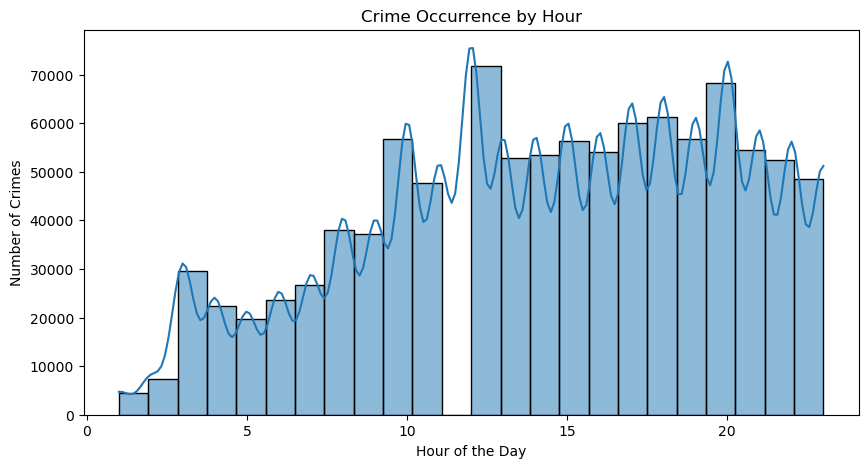

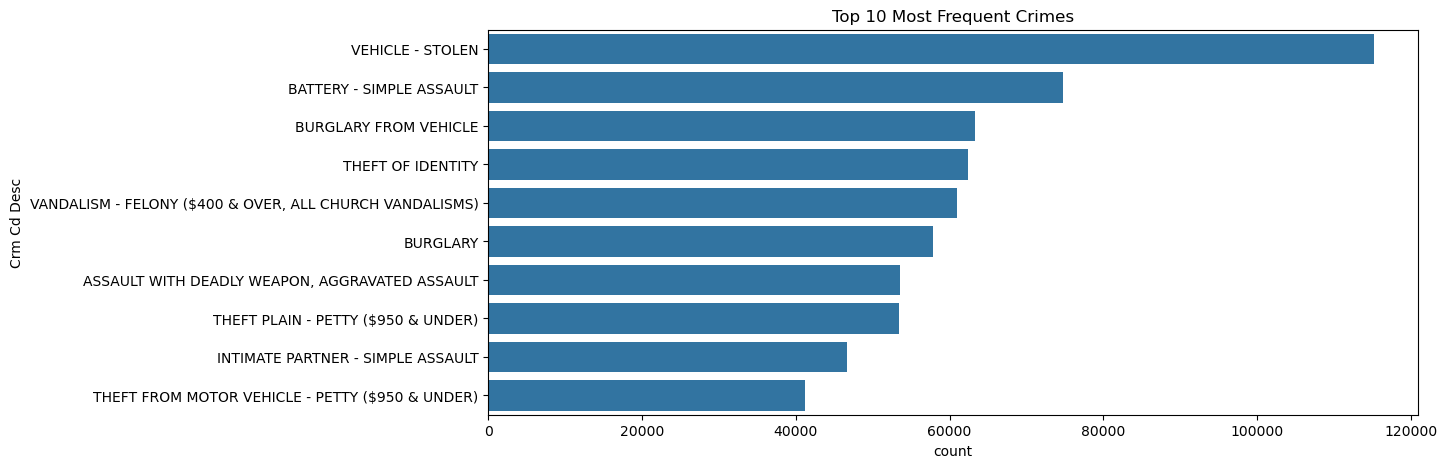

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Hour'], bins=24, kde=True)
plt.title("Crime Occurrence by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(y=data['Crm Cd Desc'], order=data['Crm Cd Desc'].value_counts().index[:10])
plt.title("Top 10 Most Frequent Crimes")
plt.show()


In [9]:
features = ['LAT', 'LON', 'Hour', 'Month', 'Day']
target = 'Crm Cd' 

data = data.dropna(subset=[target])
data[target] = data[target].astype(int)

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (802758, 5)
Test Set Shape: (200690, 5)


In [ ]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

X_test['Crime Risk'] = model.predict_proba(X_test).max(axis=1)

high_risk = X_test.sort_values(by='Crime Risk', ascending=False).head(10)
print("Top 10 High-Risk Crime Locations:\n", high_risk)
